In [1]:
#necessary imports
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
#load first df
df = pd.read_excel("Summary.xlsx")

In [3]:
df = pd.read_excel("nhlupdate7.xlsx")

In [4]:
nhl_df = df.copy()

In [5]:
#load remaining dfs and join into one file
nhl_data = pd.DataFrame()
for i in range (1,26):
    new_data = pd.read_excel(f'Summary ({i}).xlsx')
    nhl_data = pd.concat([nhl_data, new_data])
print(nhl_data)

                    Team    Season  GP   W   L   T  OT    P     P%  RW  ...  \
0          Boston Bruins  20222023  82  65  12  --   5  135  0.823  54  ...   
1     Chicago Blackhawks  20122013  48  36   7  --   5   77  0.802  25  ...   
2      Detroit Red Wings  19951996  82  62  13   7  --  131  0.799  59  ...   
3    Tampa Bay Lightning  20182019  82  62  16  --   4  128  0.780  49  ...   
4      Detroit Red Wings  20052006  82  58  16  --   8  124  0.756  51  ...   
..                   ...       ...  ..  ..  ..  ..  ..  ...    ...  ..  ...   
28       Ottawa Senators  19931994  84  14  61   9  --   37  0.220  10  ...   
29  Winnipeg Jets (1979)  19801981  80   9  57  14  --   32  0.200   9  ...   
30      Quebec Nordiques  19891990  80  12  61   7  --   31  0.194  12  ...   
31       Ottawa Senators  19921993  84  10  70   4  --   24  0.143  10  ...   
32       San Jose Sharks  19921993  84  11  71   2  --   24  0.143   8  ...   

     GA  GF/GP  GA/GP   PP%   PK%  Net PP%  Net PK%

In [ ]:
#save to csv
nhl_data.to_csv("Testing.xlsx")

In [6]:
#load csv
nhl_set = pd.read_excel("Testing.xlsx")

In [7]:
#drop unnecessary columns
nhl_set.drop(columns="Unnamed: 0", axis = 1, inplace=True)

In [8]:
#check for duplicates
dupes = nhl_set.duplicated(keep=False).sum()

In [9]:
#drop duplicated rows
new_set = nhl_set.drop_duplicates(keep="first")

In [10]:
new_set.shape

(1183, 23)

In [11]:
#save to csv
new_set.to_excel("nhldata.xlsx")

In [12]:
#load csv
nhl_df = pd.read_excel("nhldata.xlsx")

In [14]:
#check columns and drop columns that do not have values for every season
nhl_df.columns

Index(['Unnamed: 0', 'Team', 'Season', 'GP', 'W', 'L', 'T', 'OT', 'P', 'P%',
       'RW', 'ROW', 'S/O Win', 'GF', 'GA', 'GF/GP', 'GA/GP', 'PP%', 'PK%',
       'Net PP%', 'Net PK%', 'Shots/GP', 'SA/GP', 'FOW%'],
      dtype='object')

In [15]:
nhl_df.drop(columns=["RW", "ROW", "S/O Win", "L", "T", "OT", "Net PP%", "Net PK%", "FOW%"], axis = 1,  inplace = True)

In [16]:
nhl_df.drop(columns = "Unnamed: 0", axis = 1, inplace = True)

In [17]:
#make a copy of df
nhl = nhl_df.copy()

In [18]:
#reformat string column
nhl["string_season"] = nhl["Season"].astype(str)

In [19]:
nhl["new_season"] = nhl["string_season"].str[:4] + "-" + nhl["string_season"].str[4:]

In [20]:
#drop unnecessary columns
nhl.drop(columns = ["Season", "string_season"], axis = 1, inplace = True)

In [22]:
#rename column
nhl.rename(columns={"new_season" : "Season"}, inplace = True)

In [25]:
#check all the seasons listed
nhl["Season"].unique()

array(['2022-2023', '2012-2013', '1995-1996', '2018-2019', '2005-2006',
       '2021-2022', '1985-1986', '1983-1984', '2009-2010', '1981-1982',
       '2020-2021', '2015-2016', '1988-1989', '1994-1995', '1979-1980',
       '2016-2017', '2000-2001', '2019-2020', '2013-2014', '2017-2018',
       '2010-2011', '2008-2009', '1992-1993', '2001-2002', '1984-1985',
       '2023-2024', '2007-2008', '1999-2000', '1998-1999', '2014-2015',
       '2006-2007', '2002-2003', '1980-1981', '1982-1983', '2011-2012',
       '1993-1994', '2003-2004', '1997-1998', '1990-1991', '1986-1987',
       '1991-1992', '1987-1988', '1996-1997', '1989-1990'], dtype=object)

In [16]:
#create a function to categorize each season by decade
eighties = ['1979-1980', '1980-1981', '1981-1982', '1982-1983', '1983-1984', '1984-1985', '1985-1986',
            '1986-1987', '1987-1988',  '1988-1989']
nineties = ['1989-1990', '1990-1991', '1991-1992', '1992-1993', '1993-1994', '1994-1995', '1995-1996',
            '1996-1997', '1997-1998', '1998-1999']
aughts = ['1999-2000', '2000-2001', '2001-2002', '2002-2003',
            '2003-2004', '2004-2005', '2005-2006', '2006-2007', '2007-2008', '2008-2009']
tens = ['2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017',
        '2017-2018', '2018-2019']
twenties = ['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']

def add_decade(row):
    if row["Season"] in eighties:
        return "1980s"
    elif row["Season"] in nineties:
        return "1990s"
    elif row["Season"] in aughts:
        return "2000s"
    elif row["Season"] in tens:
        return "2010s"
    elif row["Season"] in twenties:
        return "2020s"




nhl_df['decade'] = nhl_df.apply (lambda row: add_decade(row), axis=1)


In [17]:
#check dataframe
nhl_df

,Unnamed: 0.1,Unnamed: 0,Team,GP,W,P,P%,GF,GA,GF/GP,GA/GP,PP%,PK%,Shots/GP,SA/GP,Season,decade,mid_decade,GF/GP Rank,Points Percentage Rank
0,0,0,Boston Bruins,82,65,135,0.823,301,174,3.67,2.12,22.2,87.3,33.0,29.8,2022-2023,2020s,20-24,2,1
1,1,1,Chicago Blackhawks,48,36,77,0.802,149,97,3.10,2.02,16.7,87.2,31.1,26.2,2012-2013,2010s,10-14,2,1
2,2,2,Detroit Red Wings,82,62,131,0.799,325,181,3.96,2.21,21.3,88.3,32.3,24.2,1995-1996,1990s,95-99,3,1
3,3,3,Tampa Bay Lightning,82,62,128,0.780,319,221,3.89,2.70,28.2,85.0,32.0,32.1,2018-2019,2010s,15-19,1,1
4,4,4,Detroit Red Wings,82,58,124,0.756,301,206,3.67,2.51,22.1,85.5,34.1,26.6,2005-2006,2000s,05-09,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,1178,1178,Ottawa Senators,84,14,37,0.220,201,397,2.39,4.73,14.5,73.3,25.6,33.0,1993-1994,1990s,90-94,26,26
1179,1179,1179,Arizona Coyotes,80,9,32,0.200,246,400,3.08,5.00,17.3,74.2,28.3,34.9,1980-1981,1980s,80-84,21,21
1180,1180,1180,Colorado Avalanche,80,12,31,0.194,240,407,3.00,5.09,18.9,74.1,28.8,34.4,1989-1990,1990s,90-94,21,21
1181,1181,1181,Ottawa Senators,84,10,24,0.143,202,395,2.40,4.70,14.7,75.0,27.2,31.8,1992-1993,1990s,90-94,24,23


In [28]:
#create a column for mid-decade values
e_eighties = ['1979-1980', '1980-1981', '1981-1982', '1982-1983', '1983-1984']
l_eighties = ['1984-1985', '1985-1986',
            '1986-1987', '1987-1988',  '1988-1989']
e_nineties = ['1989-1990', '1990-1991', '1991-1992', '1992-1993', '1993-1994']
l_nineties = [ '1994-1995', '1995-1996',
            '1996-1997', '1997-1998', '1998-1999']
e_aughts = ['1999-2000', '2000-2001', '2001-2002', '2002-2003',
            '2003-2004']
l_aughts = [ '2004-2005', '2005-2006', '2006-2007', '2007-2008', '2008-2009']
e_tens = ['2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014']
l_tens = [ '2014-2015', '2015-2016', '2016-2017',
        '2017-2018', '2018-2019']
twenties = ['2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024']

def mid_decade(row):
    if row["Season"] in e_eighties:
        return "80-84"
    elif row["Season"] in l_eighties:
        return "85-89"
    elif row["Season"] in e_nineties:
        return "90-94"
    elif row["Season"] in l_nineties:
        return "95-99"
    elif row["Season"] in e_aughts:
        return "00-04"
    elif row["Season"] in l_aughts:
        return "05-09"
    elif row["Season"] in e_tens:
        return "10-14"
    elif row["Season"] in l_tens:
        return "15-19"
    elif row["Season"] in twenties:
        return "20-24"




nhl['mid_decade'] = nhl.apply (lambda row: mid_decade(row), axis=1)


In [30]:
#check all the team values
nhl["Team"].unique()

array(['Boston Bruins', 'Chicago Blackhawks', 'Detroit Red Wings',
       'Tampa Bay Lightning', 'Pittsburgh Penguins', 'Florida Panthers',
       'Edmonton Oilers', 'Washington Capitals', 'New York Islanders',
       'Colorado Avalanche', 'Vegas Golden Knights', 'Calgary Flames',
       'Philadelphia Flyers', 'Montréal Canadiens', 'Carolina Hurricanes',
       'Nashville Predators', 'Vancouver Canucks', 'San Jose Sharks',
       'Anaheim Ducks', 'New York Rangers', 'Toronto Maple Leafs',
       'St. Louis Blues', 'Dallas Stars', 'Winnipeg Jets',
       'Buffalo Sabres', 'Ottawa Senators', 'Minnesota Wild',
       'New Jersey Devils', 'Quebec Nordiques', 'Columbus Blue Jackets',
       'Phoenix Coyotes', 'Los Angeles Kings', 'Seattle Kraken',
       'Minnesota North Stars', 'Winnipeg Jets (1979)',
       'Atlanta Thrashers', 'Hartford Whalers', 'Arizona Coyotes',
       'Atlanta Flames', 'Colorado Rockies'], dtype=object)

In [31]:
#check odd team name values
nhl[nhl["Team"] == "Winnipeg Jets (1979)"]

,Team,GP,W,P,P%,GF,GA,GF/GP,GA/GP,PP%,PK%,Shots/GP,SA/GP,Season,decade,mid_decade
323,Winnipeg Jets (1979),80,43,96,0.600,358,332,4.48,4.15,24.0,77.6,31.9,31.7,1984-1985,80s,85-89
547,Winnipeg Jets (1979),80,40,88,0.550,279,271,3.49,3.39,17.3,83.6,30.7,27.5,1986-1987,80s,85-89
631,Winnipeg Jets (1979),80,37,85,0.531,298,290,3.73,3.63,18.7,82.9,30.4,29.7,1989-1990,90s,90-94
684,Winnipeg Jets (1979),84,40,87,0.518,322,320,3.83,3.81,20.9,81.7,30.7,32.7,1992-1993,90s,90-94
716,Winnipeg Jets (1979),80,33,81,0.506,251,244,3.14,3.05,20.9,84.1,29.1,31.2,1991-1992,90s,90-94
758,Winnipeg Jets (1979),80,33,80,0.500,319,332,3.99,4.15,22.6,75.5,32.9,32.5,1981-1982,80s,80-84
826,Winnipeg Jets (1979),80,33,77,0.481,292,310,3.65,3.88,25.5,78.8,31.4,29.8,1987-1988,80s,85-89
846,Winnipeg Jets (1979),82,36,78,0.476,275,291,3.35,3.55,19.7,79.5,29.4,33.7,1995-1996,90s,95-99
894,Winnipeg Jets (1979),80,33,74,0.463,311,333,3.89,4.16,23.0,73.1,31.8,31.6,1982-1983,80s,80-84
909,Winnipeg Jets (1979),80,31,73,0.456,340,374,4.25,4.68,21.5,74.6,32.3,32.7,1983-1984,80s,80-84


In [32]:
#make a copy
nhl_df = nhl.copy()

In [33]:
#replace inactive/relocated franchises with their current cities
nhl_df["Team"].replace({"Winnipeg Jets (1979)" : "Arizona Coyotes",
                        "Hartford Whalers" : "Carolina Hurricanes",
                        "Minnesota North Stars" : "Dallas Stars",
                        "Phoenix Coyotes" : "Arizona Coyotes",
                        "Quebec Nordiques" : "Colorado Avalanche",
                        "Atlanta Thrashers" : "Winnipeg Jets",
                        "Atlanta Flames" : "Calgary Flames",
                        "Colorado Rockies" : "New Jersey Devils"}, inplace = True)
                        

In [5]:
#rename columns
nhl_df.rename(columns= {"P%" : "Points Percentage", "PP%" : "Powerplay Percentage",
                        "PK%" : "Penalty Kill Percentage", "GF/GP" : "Goals For Per Game",
                        "GA/GP" : "Goals Against Per Game", "Shots/GP" : "Shots Per Game"}, inplace = True)

In [29]:
#fucntion to show the the top ten teams from 1979-2024 in any category
def best_ten(df, column):
    top_ten = df.sort_values(by=column, ascending=False).head(10)
    print(top_ten[["Team", column, "Season"]])
    

In [31]:
#the top ten regular season teams by points percentage
top_ten_rs_teams = best_ten(nhl_df, "Points Percentage")

                  Team  Points Percentage     Season
0        Boston Bruins              0.823  2022-2023
1   Chicago Blackhawks              0.802  2012-2013
2    Detroit Red Wings              0.799  1995-1996
3  Tampa Bay Lightning              0.780  2018-2019
4    Detroit Red Wings              0.756  2005-2006
5  Pittsburgh Penguins              0.750  2012-2013
6     Florida Panthers              0.744  2021-2022
8      Edmonton Oilers              0.744  1983-1984
7      Edmonton Oilers              0.744  1985-1986
9  Washington Capitals              0.738  2009-2010


In [32]:
#top ten regular season teams by goals per game
top_ten_goals_per_game = best_ten(nhl_df, "Goals For Per Game")
#All top 10 teams are in the 1980s

                   Team  Goals For Per Game     Season
8       Edmonton Oilers                5.58  1983-1984
7       Edmonton Oilers                5.33  1985-1986
110     Edmonton Oilers                5.30  1982-1983
40      Edmonton Oilers                5.21  1981-1982
68      Edmonton Oilers                5.01  1984-1985
128      Calgary Flames                4.96  1987-1988
10   New York Islanders                4.81  1981-1982
463   Los Angeles Kings                4.70  1988-1989
111     Edmonton Oilers                4.65  1986-1987
371      Calgary Flames                4.54  1984-1985


In [33]:
#top 10 power plays since 1979
top_ten_power_plays = best_ten(nhl_df, "Powerplay Percentage")

                    Team  Powerplay Percentage     Season
103      Edmonton Oilers                  32.4  2022-2023
390      Edmonton Oilers                  29.5  2019-2020
296  Tampa Bay Lightning                  29.5  2023-2024
110      Edmonton Oilers                  29.3  1982-1983
50    New York Islanders                  29.3  1980-1981
90    Montréal Canadiens                  29.1  1979-1980
128       Calgary Flames                  28.5  1987-1988
3    Tampa Bay Lightning                  28.2  2018-2019
10    New York Islanders                  27.8  1981-1982
244       Calgary Flames                  27.7  1989-1990


In [34]:
#top 10 penalty kills since 1979
top_ten_pk = best_ten(nhl_df, "Penalty Kill Percentage")


                    Team  Penalty Kill Percentage     Season
229    New Jersey Devils                     89.6  2011-2012
240         Dallas Stars                     89.3  1999-2000
524        Boston Bruins                     89.2  1998-1999
503  Washington Capitals                     89.2  1997-1998
836   Montréal Canadiens                     88.6  2011-2012
2      Detroit Red Wings                     88.3  1995-1996
180    New Jersey Devils                     88.1  1996-1997
105         Dallas Stars                     88.0  1997-1998
327       Buffalo Sabres                     88.0  2000-2001
392      Ottawa Senators                     88.0  2012-2013


In [3]:
#function to rank the seasons by a specific column
def season_rank(df, column):
    rank = df.groupby(by="Season")[column].mean().sort_values(ascending=False)
    print(rank)

In [4]:
#function to rank the decades by a specific column
def decade_rank(df, column):
    rank = df.groupby("decade")[column].mean().sort_values(ascending=False)
    print(rank)

In [5]:
#function to rank teams by a specific column
def team_rank(df, column):
    rank = df.groupby("Team")[column].mean().sort_values(ascending=False)
    print(rank)

In [37]:
#seasons ranked by goals for average
goals_per_game_seasons = season_rank(nhl_df, "Goals For Per Game")

Season
1981-1982    4.014286
1985-1986    3.970952
1983-1984    3.946190
1984-1985    3.887619
1982-1983    3.866667
1980-1981    3.844762
1988-1989    3.742381
1987-1988    3.713810
1989-1990    3.685238
1986-1987    3.670952
1992-1993    3.626667
1979-1980    3.514762
1991-1992    3.480455
1990-1991    3.456190
1993-1994    3.242308
2022-2023    3.142500
1995-1996    3.142308
2021-2022    3.106875
2023-2024    3.081562
2005-2006    3.025667
1994-1995    2.986923
2018-2019    2.980645
2019-2020    2.980000
2017-2018    2.930000
1996-1997    2.916538
2020-2021    2.898387
2006-2007    2.878667
2008-2009    2.847333
2009-2010    2.765333
2000-2001    2.757333
1999-2000    2.747143
2010-2011    2.733333
2016-2017    2.725333
2007-2008    2.719000
2013-2014    2.671667
2015-2016    2.668667
2014-2015    2.662333
2011-2012    2.660000
2002-2003    2.655000
2012-2013    2.654667
1997-1998    2.638077
1998-1999    2.632222
2001-2002    2.618333
2003-2004    2.568667
Name: Goals For Per Game,

In [39]:
#decades ranked by goals for per game average
goals_per_game_decade = decade_rank(nhl_df, "Goals For Per Game")

decade
1980s    3.817238
1990s    3.154000
2020s    3.043165
2000s    2.757537
2010s    2.746589
Name: Goals For Per Game, dtype: float64


In [40]:
#teams ranked by goals for per game average
goals_per_team = team_rank(nhl_df, "Goals For Per Game")


Team
Pittsburgh Penguins      3.348864
Edmonton Oilers          3.329318
Colorado Avalanche       3.249318
Calgary Flames           3.241136
Philadelphia Flyers      3.227727
Boston Bruins            3.224773
Detroit Red Wings        3.211818
Vegas Golden Knights     3.211429
Washington Capitals      3.189545
Toronto Maple Leafs      3.181364
New York Rangers         3.167955
Los Angeles Kings        3.140000
St. Louis Blues          3.129091
Dallas Stars             3.105682
Montréal Canadiens       3.101136
New York Islanders       3.092727
Chicago Blackhawks       3.088182
Vancouver Canucks        3.082727
Buffalo Sabres           3.058409
Carolina Hurricanes      2.985227
Arizona Coyotes          2.972727
New Jersey Devils        2.937045
Seattle Kraken           2.913333
Tampa Bay Lightning      2.873548
Ottawa Senators          2.826452
Winnipeg Jets            2.820833
San Jose Sharks          2.783125
Florida Panthers         2.751000
Nashville Predators      2.728000
Minnesota

In [44]:
#create function to graph the average of given column by decade
def decade_mean_graph(df, column):
    df = nhl_df.groupby("decade")[column].mean()
    df = pd.DataFrame(df)
    df = df.reset_index()
    fig = px.bar(df, x=df["decade"], y = df[column], title = column + " Average Per Decade")
    fig.show()
    

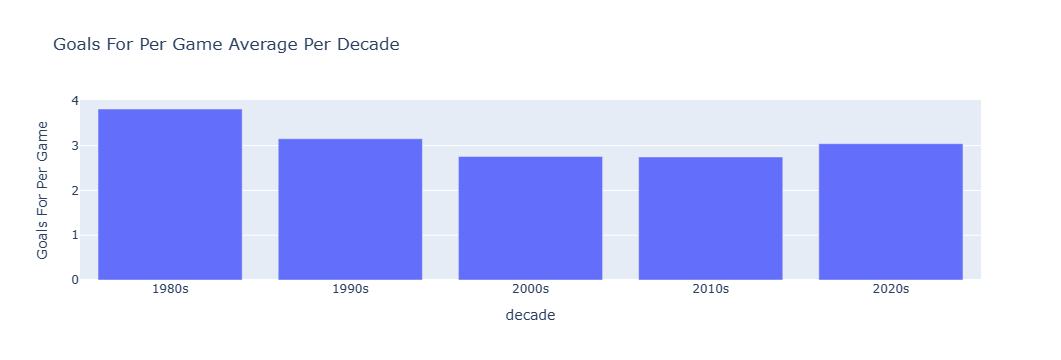

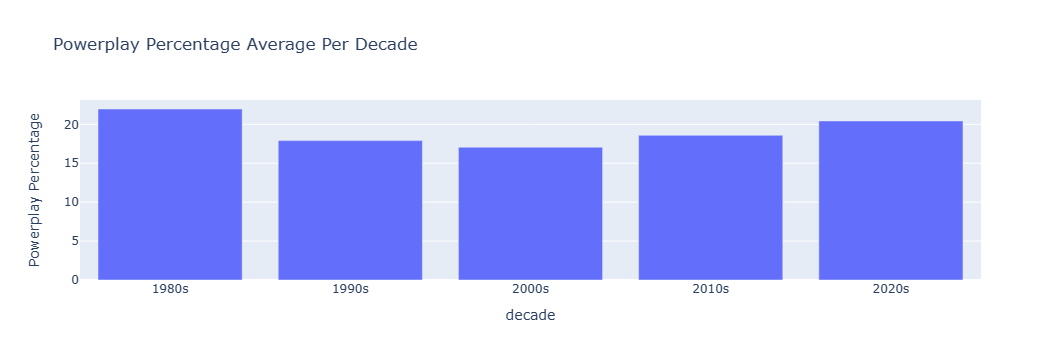

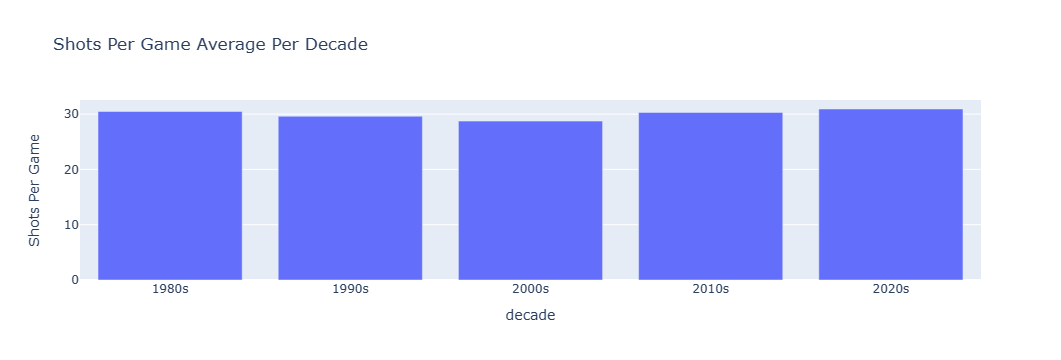

In [45]:
columns = ["Goals For Per Game","Powerplay Percentage", "Shots Per Game" ]
for column in columns:
    decade_mean_graph(nhl_df, column)

In [46]:
#create function to graph the average of a given column by season
def season_mean_graph(df, column):
    df = nhl_df.groupby("Season")[column].mean()
    df = pd.DataFrame(df)
    df = df.reset_index()
    fig = px.bar(df, x=df["Season"], y = df[column], title = column + " Average Per Season", color = column,
                color_continuous_scale = "teal")
    fig.show()

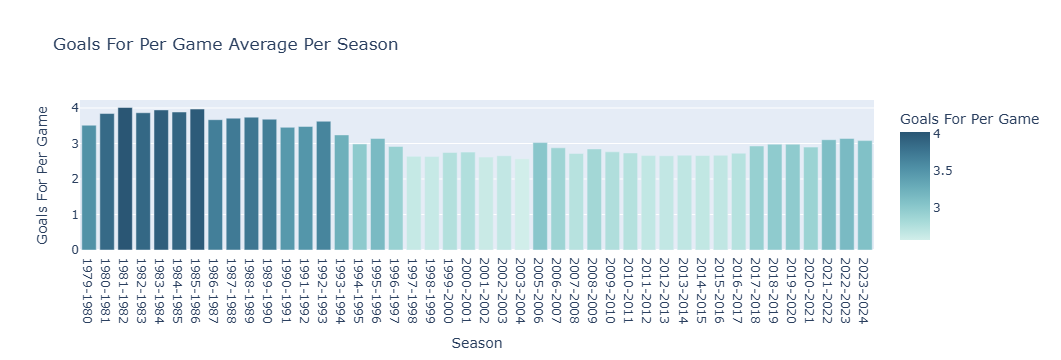

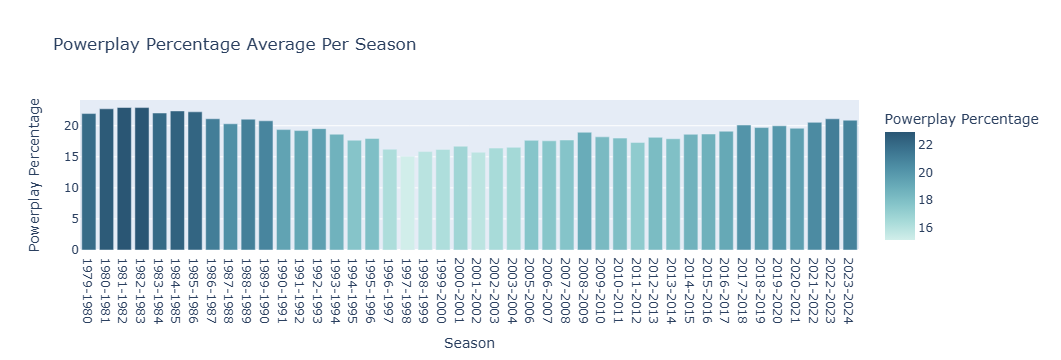

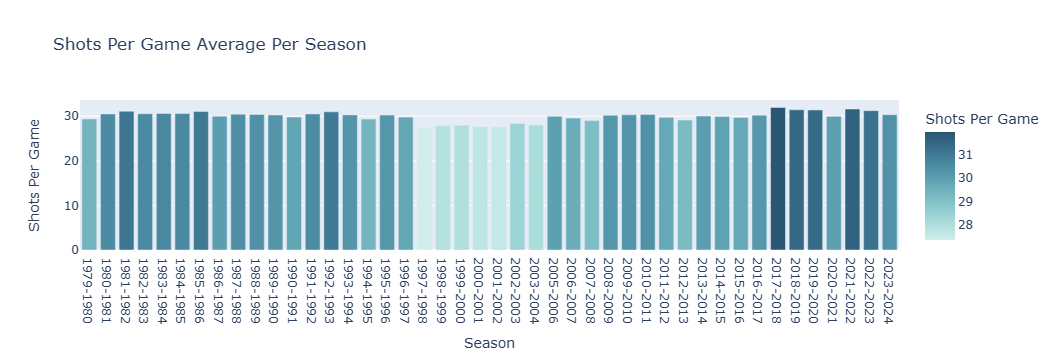

In [47]:
columns = ["Goals For Per Game","Powerplay Percentage", "Shots Per Game" ]
for column in columns:
    season_mean_graph(nhl_df, column)

In [50]:
#function to compare relationship between two metrics for all teams & seasons from 1979 to 2024
def compare_two_metrics(df, column1, column2):
    fig = px.scatter(df, x = df[column1], y = df[column2], title = column1 + " vs. " + column2 + " from 1979-1980 to 2023-2024",
                     hover_data = ["Team", "Season"], color = df["decade"])
    fig.show()

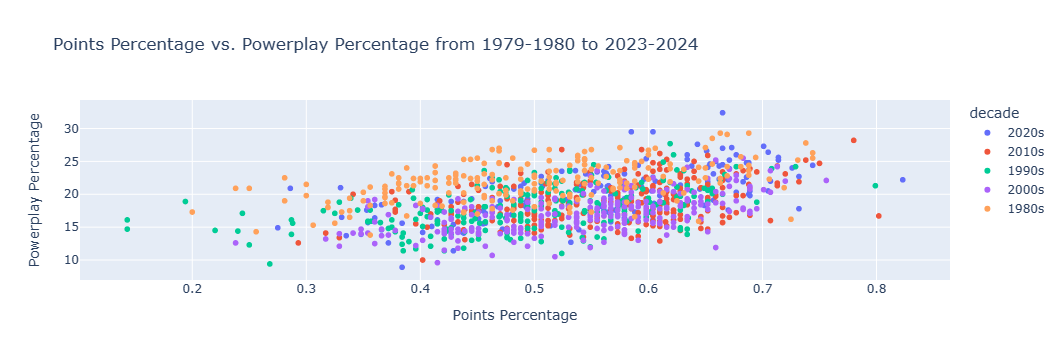

In [51]:
compare_two_metrics(nhl_df, "Points Percentage", "Powerplay Percentage")

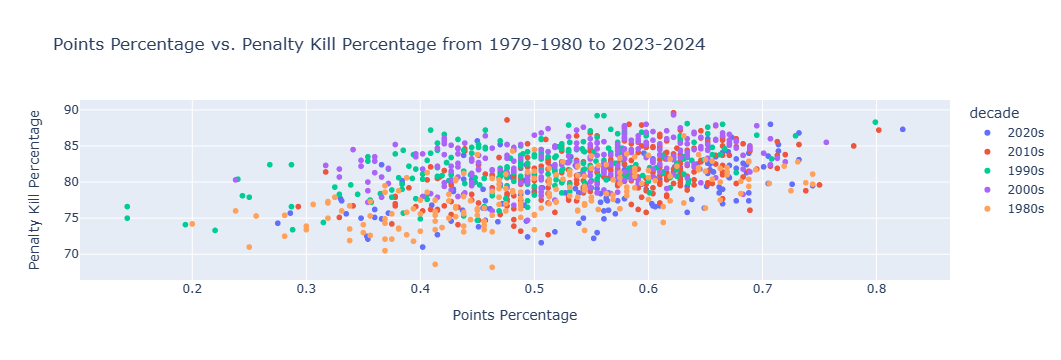

In [52]:
compare_two_metrics(nhl_df, "Points Percentage", "Penalty Kill Percentage")

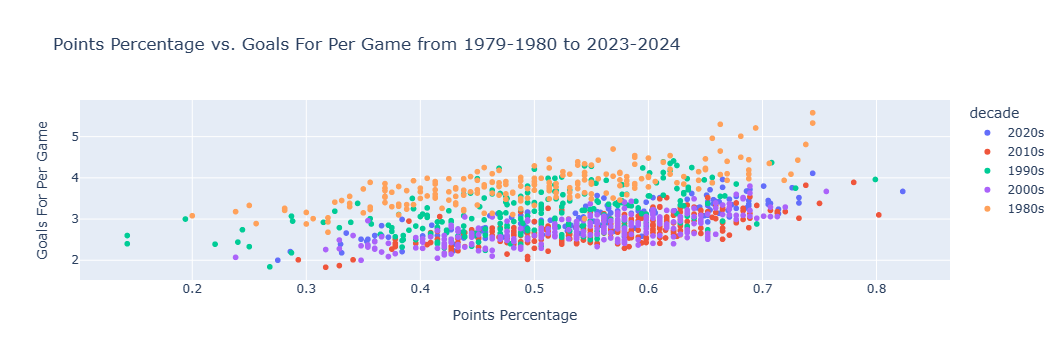

In [53]:
compare_two_metrics(nhl_df, "Points Percentage", "Goals For Per Game")

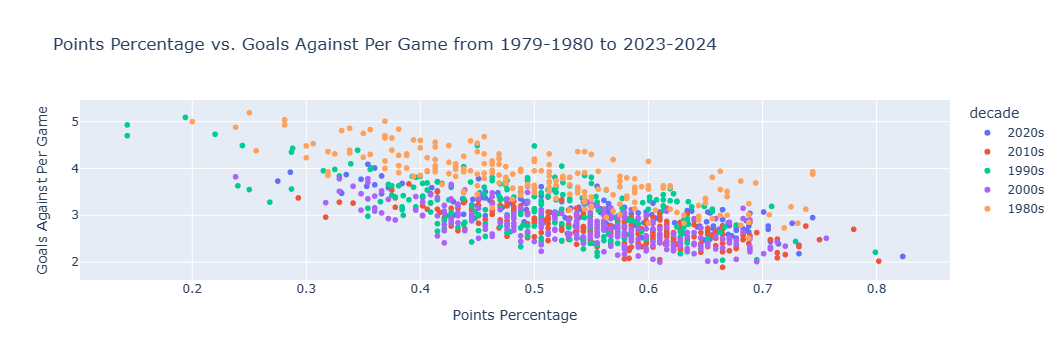

In [54]:
compare_two_metrics(nhl_df, "Points Percentage", "Goals Against Per Game")

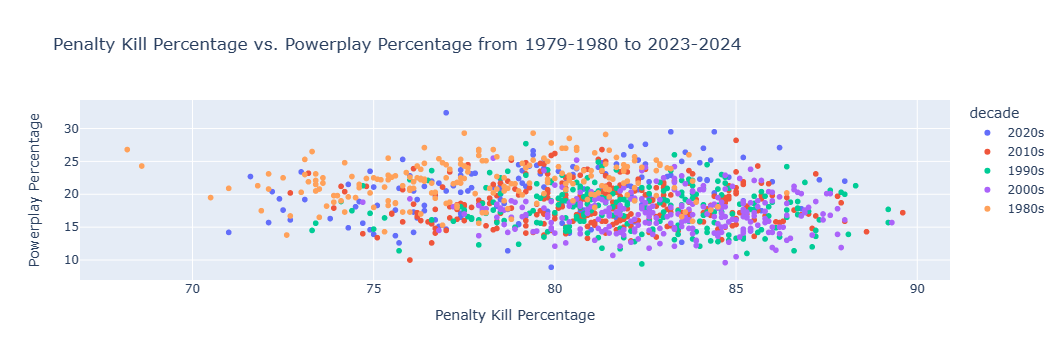

In [56]:
compare_two_metrics(nhl_df, "Penalty Kill Percentage", "Powerplay Percentage")

In [58]:
#function to create graph that shows a team's metrics each season with a line containing the league average
def team_seasons(team, column):
    fig = go.Figure()
    df2 = nhl_df[nhl_df["Team"] == team]
    df2 = df2.sort_values(by="Season")
    df = nhl_df.groupby("Season")[column].mean()
    df = pd.DataFrame(df)
    df = df.reset_index()
    fig.add_trace(go.Bar(x=df2["Season"], y = df2[column], name = team))
    fig.add_trace(go.Scatter(x=df["Season"], y=df[column], mode = "lines",  name = "League Average"))

    fig.update_layout(title = team + " " + column + " " + "vs. League Average Per Season",
                      xaxis_title = "Season",
                      yaxis_title = column,
                      title_font_size = 18)
    fig.show()

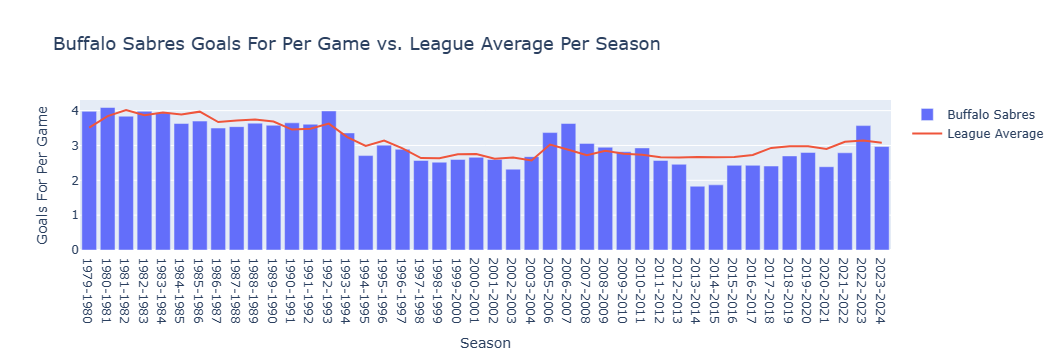

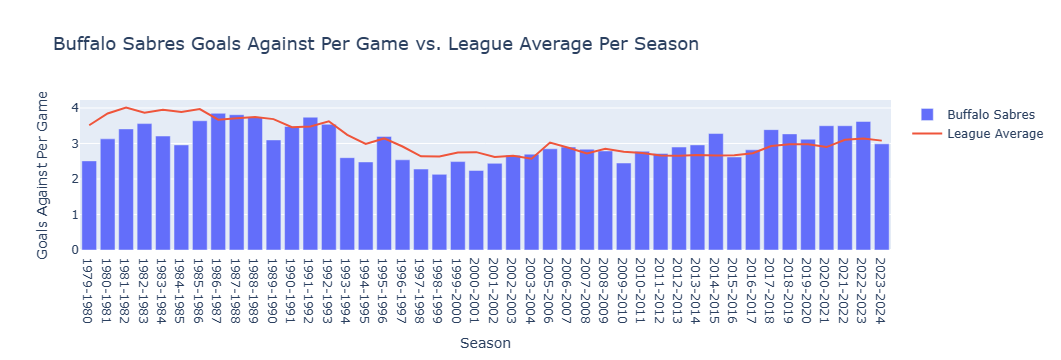

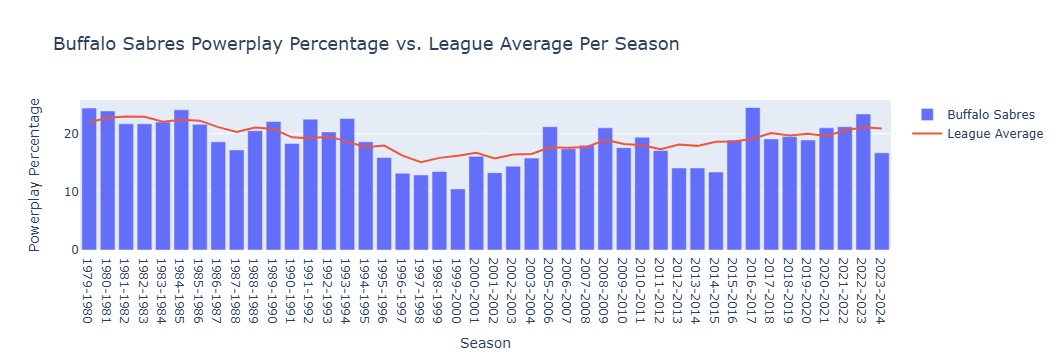

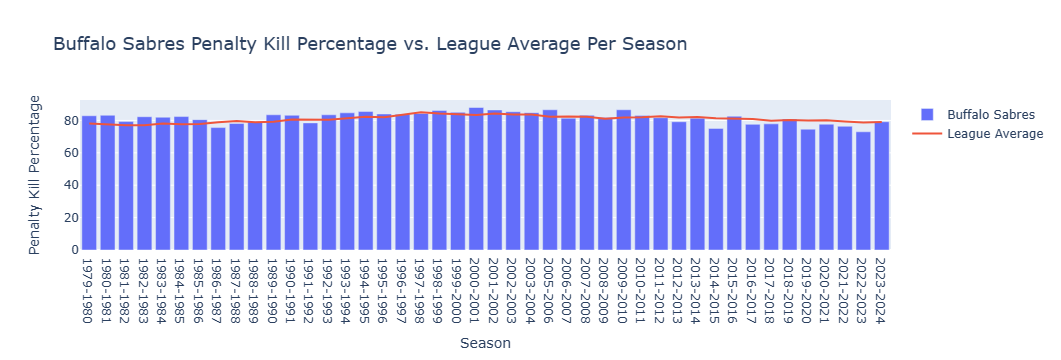

In [59]:
columns = ["Goals For Per Game", "Goals Against Per Game", "Powerplay Percentage", "Penalty Kill Percentage"]
for column in columns:
    team_seasons("Buffalo Sabres", column)

In [62]:
#function to compare a metric to a team's win percentage
def compare_to_win_pct(df, team, column):
     df = df[df["Team"] == team]
     df = df.sort_values(by="Season")
     fig = px.scatter(df, x = df["Points Percentage"], y = df[column], title = team + " " + column + " from 1979-1980 to 2023-2024",
                     hover_data = ["Season"], color = df["decade"])
     fig.show()

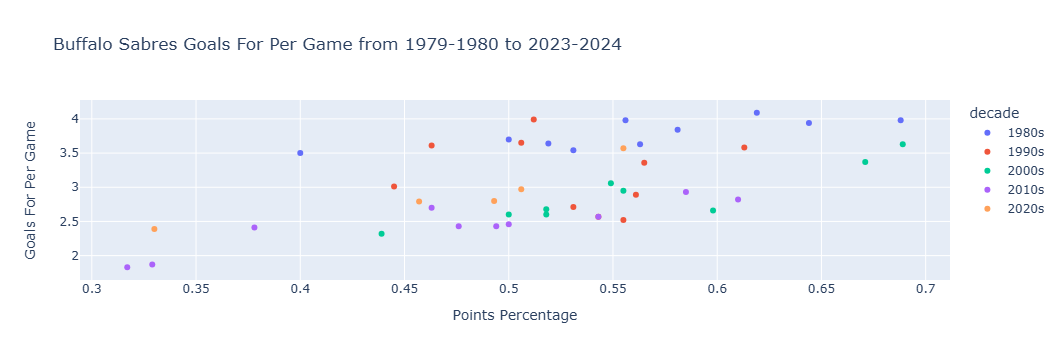

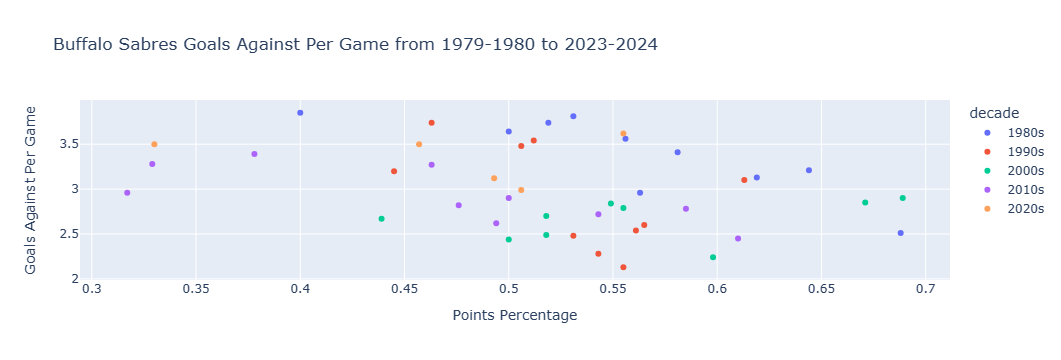

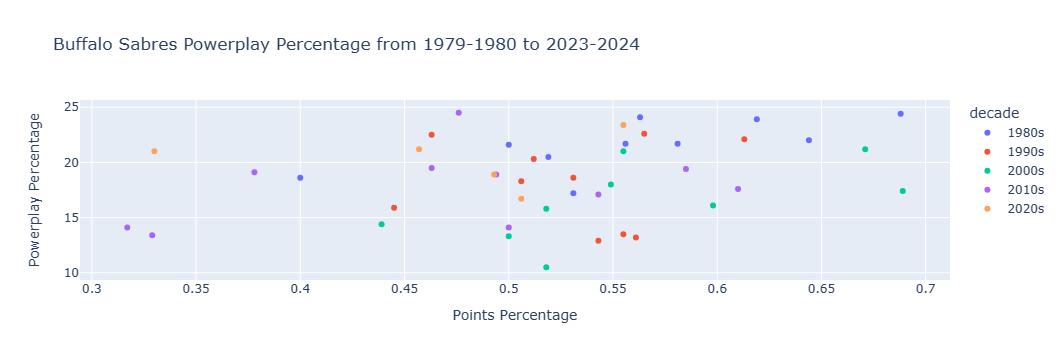

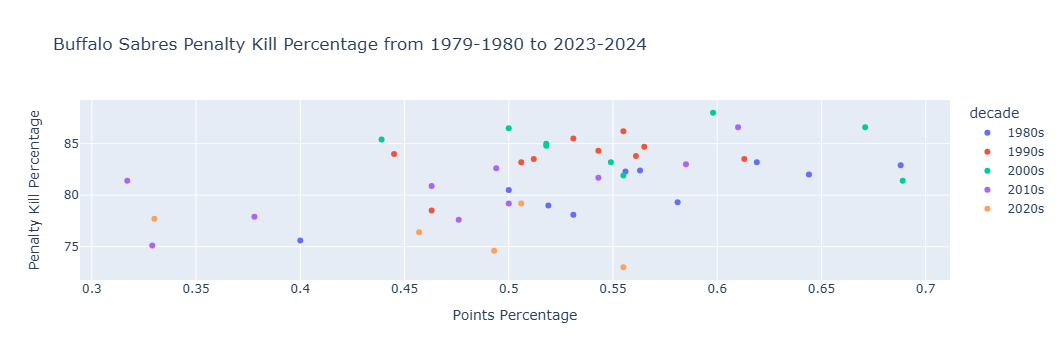

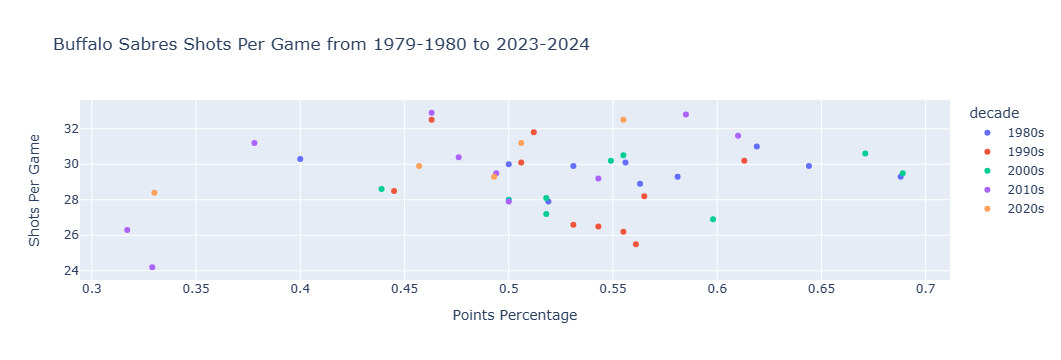

In [63]:
columns = ["Goals For Per Game", "Goals Against Per Game", "Powerplay Percentage", "Penalty Kill Percentage", "Shots Per Game"]
for column in columns:
    compare_to_win_pct(nhl_df, "Buffalo Sabres", column)

In [68]:
#dataframe to show correlation between certain variables ---mostly looking at the variable with strongest relationship
#to points percentage
corr_map_data = nhl_df[["Points Percentage", "Goals For Per Game", "Goals Against Per Game", "Powerplay Percentage", 
                        "Penalty Kill Percentage", "Shots Per Game", "SA/GP"]]
corr_map_data.corr()


,Points Percentage,Goals For Per Game,Goals Against Per Game,Powerplay Percentage,Penalty Kill Percentage,Shots Per Game,SA/GP
Points Percentage,1.000000,0.331194,-0.635396,0.388795,0.444249,0.436647,-0.432314
Goals For Per Game,0.331194,1.000000,0.446826,0.684470,-0.240324,0.474801,0.051871
Goals Against Per Game,-0.635396,0.446826,1.000000,0.204100,-0.709130,0.008528,0.554860
Powerplay Percentage,0.388795,0.684470,0.204100,1.000000,-0.196932,0.438808,0.072737
Penalty Kill Percentage,0.444249,-0.240324,-0.709130,-0.196932,1.000000,-0.078065,-0.484751
Shots Per Game,0.436647,0.474801,0.008528,0.438808,-0.078065,1.000000,-0.042590
SA/GP,-0.432314,0.051871,0.554860,0.072737,-0.484751,-0.042590,1.000000
